## Examples with ```CopasiProcess``` using ``builder.Builder`` and ``biosimulator_processes.data_model``

In [1]:
import sys 

sys.path.insert(0, '..')

In [2]:
import os 
from process_bigraph import pp, pf 
from biosimulator_processes.data_model import *
from biosimulator_processes.biosimulator_builder import BiosimulatorBuilder

CobraProcess registered successfully.
CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.


#### Initialize a fresh instance of the `BiosimulatorBuilder`, which is inherently configured by `biosimulator_processes.CORE` in the top level.

In [3]:
b = BiosimulatorBuilder()

#### Example 1: Add a simple `CopasiProcess`-based composite to the bigraph, specifying parameter values through the `data_model`. For now, let's try loading a biomodel and adding a change to initial concentration of a species. We will then add another copasi process instance, whose model is this time loaded from a file (to demonstrate the data model)

Let's define a model instance from a file.

In [3]:
model_filepath = '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'

os.path.exists(model_filepath)

True

In [5]:
# Uncomment if you wish to inspect the species referenced below
# model_from_file = load_model(model_filepath)
# get_species(model=model_from_file)

In [6]:
# 1. specify model changes (we know the model specs as we are providing the file. TODO: allow users to introspect the model before change)
process_model_changes = ModelChanges(
    species_changes=[SpeciesChanges(name='ADP', initial_concentration=2.1**3)]
)


pp(process_model_changes.model_dump())

{ 'global_parameter_changes': [],
  'reaction_changes': [],
  'species_changes': [ { 'expression': '',
                         'initial_concentration': 9.261000000000001,
                         'initial_expression': '',
                         'initial_particle_number': None,
                         'name': 'ADP',
                         'unit': ''}]}


In [7]:
# 2. define the model schema to be used by the composite process (one of the copasiprocess config parameters)

process_model_from_file = Model(
    model_id='copasi_process_from_file',
    model_source=model_filepath,
    model_name='Simple Composite Process from File',
    model_changes=process_model_changes
)


pp(process_model_from_file.model_dump())

{ 'model_changes': { 'global_parameter_changes': [],
                     'reaction_changes': [],
                     'species_changes': [ { 'expression': '',
                                            'initial_concentration': 9.261000000000001,
                                            'initial_expression': '',
                                            'initial_particle_number': None,
                                            'name': 'ADP',
                                            'unit': ''}]},
  'model_id': 'copasi_process_from_file',
  'model_language': 'sbml',
  'model_name': 'Simple Composite Process from File',
  'model_source': { 'value': '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'},
  'model_units': None}


In [8]:
# 3. Define config schema to be used as 'config' parameter of Process constructor
process_config_from_file = CopasiProcessConfigSchema(
    method='deterministic',
    model=process_model_from_file,
    process_name='simple_copasi_from_file'
)


pp(process_config_from_file.model_dump())

{ 'method': 'deterministic',
  'model': { 'model_changes': { 'global_parameter_changes': [],
                                'reaction_changes': [],
                                'species_changes': [ { 'expression': '',
                                                       'initial_concentration': 9.261000000000001,
                                                       'initial_expression': '',
                                                       'initial_particle_number': None,
                                                       'name': 'ADP',
                                                       'unit': ''}]},
             'model_id': 'copasi_process_from_file',
             'model_language': 'sbml',
             'model_name': 'Simple Composite Process from File',
             'model_source': { 'value': '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'},
             'model_units': None},
  'process_name': 'simple_copasi_from_file'}


In [9]:
process_config_from_file.process_name, process_config_from_file.method, process_config_from_file.model

('simple_copasi_from_file',
 'deterministic',
 {'model_id': 'copasi_process_from_file',
  'model_source': {'value': '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'},
  'model_language': 'sbml',
  'model_name': 'Simple Composite Process from File',
  'model_changes': {'species_changes': [{'name': 'ADP',
     'unit': '',
     'initial_concentration': 9.261000000000001,
     'initial_particle_number': None,
     'initial_expression': '',
     'expression': ''}],
   'global_parameter_changes': [],
   'reaction_changes': []},
  'model_units': None})

In [10]:
# 4. Add the process instance by the name of 'simple_copasi' to the builder


b[process_config_from_file.process_name].add_process(
    name='CopasiProcess',
    model=process_config_from_file.model,
    method=process_config_from_file.method
)

Let's now add a biomodel with adjusted params (we know ahead of time)

In [11]:
# Uncomment if you wish to introspect the model referred below
# from basico import *
# from basico import biomodels
# 
# 
# biomodel_id = 'BIOMD0000000861'
# biomodel = load_biomodel(biomodel_id)
# get_species(model=biomodel)

In [12]:
# reaction_names = get_reactions(model=biomodel)
# 
# reaction_names

In [13]:
rparam = ReactionParameter(
    parameter_name='EpoRpRJAK2',
    value=21312.2
)

rparam2 = ReactionParameter(
    parameter_name='EpoRJAK2',
    value=21312.2
)

rc1 = ReactionChanges(
    reaction_name='reaction_1',
    parameter_changes=[rparam, rparam2]
)

rc2 = ReactionChanges(
    reaction_name='reaction_11',
    reaction_scheme='A + B -> C'
)

In [14]:
biomodel_process_changes = ModelChanges(
    reaction_changes=[rc1, rc2]
)

In [15]:
pp(biomodel_process_changes.model_dump())

{ 'global_parameter_changes': [],
  'reaction_changes': [ { 'parameter_changes': [ { 'parameter_name': 'EpoRpRJAK2',
                                                   'value': 21312.2},
                                                 { 'parameter_name': 'EpoRJAK2',
                                                   'value': 21312.2}],
                          'reaction_name': 'reaction_1',
                          'reaction_scheme': None},
                        { 'parameter_changes': [],
                          'reaction_name': 'reaction_11',
                          'reaction_scheme': 'A + B -> C'}],
  'species_changes': []}


In [16]:
biomodel_id = 'BIOMD0000000861'


biomodel_process_model = Model(
    model_id=biomodel_id,
    model_source=biomodel_id,
    model_name='composite_from_biomodel',
    model_changes=biomodel_process_changes
)

pp(biomodel_process_model.model_dump())

{ 'model_changes': { 'global_parameter_changes': [],
                     'reaction_changes': [ { 'parameter_changes': [ { 'parameter_name': 'EpoRpRJAK2',
                                                                      'value': 21312.2},
                                                                    { 'parameter_name': 'EpoRJAK2',
                                                                      'value': 21312.2}],
                                             'reaction_name': 'reaction_1',
                                             'reaction_scheme': None},
                                           { 'parameter_changes': [],
                                             'reaction_name': 'reaction_11',
                                             'reaction_scheme': 'A + B -> C'}],
                     'species_changes': []},
  'model_id': 'BIOMD0000000861',
  'model_language': 'sbml',
  'model_name': 'composite_from_biomodel',
  'model_source': {'value': 'BIOMD000000086

In [17]:
biomodel_process_config = CopasiProcessConfigSchema(
    process_name='copasi_process_from_biomodel',
    model=biomodel_process_model,
    method='stochastic'
)


pp(biomodel_process_config.model_dump())

{ 'method': 'stochastic',
  'model': { 'model_changes': { 'global_parameter_changes': [],
                                'reaction_changes': [ { 'parameter_changes': [ { 'parameter_name': 'EpoRpRJAK2',
                                                                                 'value': 21312.2},
                                                                               { 'parameter_name': 'EpoRJAK2',
                                                                                 'value': 21312.2}],
                                                        'reaction_name': 'reaction_1',
                                                        'reaction_scheme': None},
                                                      { 'parameter_changes': [],
                                                        'reaction_name': 'reaction_11',
                                                        'reaction_scheme': 'A '
                                                                   

Add the biomodel config to the bigraph

In [18]:
b[biomodel_process_config.process_name].add_process(
    name='CopasiProcess',
    model=biomodel_process_config.model,
    method=biomodel_process_config.method
)

Visualize the added processes

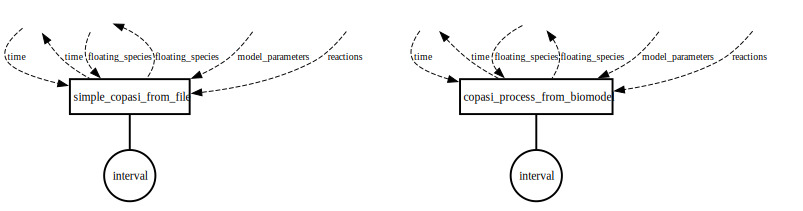

In [19]:
b.visualize()

Connect the processes together with the default store name:

In [20]:
b.connect_all(append_to_store_name='_store')

b

Builder({ 'copasi_process_from_biomodel': { '_type': 'process',
                                    'address': 'local:CopasiProcess',
                                    'config': { 'method': 'stochastic',
                                                'model': { 'model_changes': { 'global_parameter_changes': [ ],
                                                                              'reaction_changes': [ { 'parameter_changes': [ { 'parameter_name': 'EpoRpRJAK2',
                                                                                                                               'value': 21312.2},
                                                                                                                             { 'parameter_name': 'EpoRJAK2',
                                                                                                                               'value': 21312.2}],
                                                                          

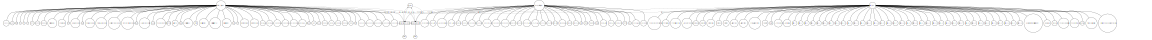

In [21]:
b.visualize()

Run composite 

In [22]:
composite = b.generate()

In [23]:
composite.run(10)

Error while running the simulation: >ERROR 2024-03-04T18:07:02<
  CCopasiTask (5): No output file defined for report of task 'Time-Course'.>EXCEPTION 2024-03-04T18:07:02<
  CTrajectoryMethod (25): Invalid state at time '0.010000'.
/Users/alex/Desktop/uchc_work/biosimulator-processes/notebooks/../biosimulator_processes/processes/copasi_process.py:253: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

Error while initializing the simulation: >ERROR 2024-03-04T18:07:03<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': nan, 'Cytosolic glucose': nan, 'ATP': nan, 'Glucose-6-Phosphate': nan, 'ADP': nan, 'Fructose-6-Phosphate': nan, 'Fructose 1,6-bisphosphate': nan, 'Glyceraldehyde 3-phosphate': nan, 'Dihydroxyacetone phosphate': nan, 'NAD': nan, '1,3-Bisphosphoglycerate': nan, 'NADH': nan, 'Phosphoenolpyruvate': nan, 'Pyruvate': nan, 'Acetaldehyde': nan, 'EtOH': nan, 'Extracellular ethanol': nan, 'Glycerol': nan, 'Extracellular glycerol': nan, 'Extracellular acetaldehyde': nan, 'Extracellular cyanide': nan, 'AMP': nan, 'P': 0.0, 'Mixed flow cyanide': 0.0, 'Mixed flow glucose': 0.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'EpoRJAK2': 3.9762200000000005, 'EpoRpJAK2': 0.0, 'p1EpoRpJAK2': 0.0, 'p2EpoRpJAK2': 0.0, 'p12EpoRpJAK2': 0.0, 'EpoRJAK2_CIS': 0.0, 'SHP1': 26.725100000000005, 'SHP1Act': 0.0, 'STAT5': 79.7535, 'pSTAT5': 0.0, 'npSTAT5': 0.0, 'CISnRNA1': 0.0, 'CISnRNA2': 0.0, 'CISnRNA3': 0.0,

Exception: trying to update a key that is not in the schemafor state: Extracellular glucose
{'Extracellular glucose': 0.0, 'Cytosolic glucose': 0.0, 'ATP': 0.0, 'Glucose-6-Phosphate': 0.0, 'ADP': 0.0, 'Fructose-6-Phosphate': 0.0, 'Fructose 1,6-bisphosphate': 0.0, 'Glyceraldehyde 3-phosphate': 0.0, 'Dihydroxyacetone phosphate': 0.0, 'NAD': 0.0, '1,3-Bisphosphoglycerate': 0.0, 'NADH': 0.0, 'Phosphoenolpyruvate': 0.0, 'Pyruvate': 0.0, 'Acetaldehyde': 0.0, 'EtOH': 0.0, 'Extracellular ethanol': 0.0, 'Glycerol': 0.0, 'Extracellular glycerol': 0.0, 'Extracellular acetaldehyde': 0.0, 'Extracellular cyanide': 0.0, 'AMP': 0.0, 'P': 0.0, 'Mixed flow cyanide': 0.0, 'Mixed flow glucose': 0.0, 'EpoRJAK2': 0.0, 'EpoRpJAK2': 0.0, 'p1EpoRpJAK2': 0.0, 'p2EpoRpJAK2': 0.0, 'p12EpoRpJAK2': 0.0, 'EpoRJAK2_CIS': 0.0, 'SHP1': 0.0, 'SHP1Act': 0.0, 'STAT5': 0.0, 'pSTAT5': 0.0, 'npSTAT5': 0.0, 'CISnRNA1': 0.0, 'CISnRNA2': 0.0, 'CISnRNA3': 0.0, 'CISnRNA4': 0.0, 'CISnRNA5': 0.0, 'CISRNA': 0.0, 'CIS': 0.0, 'SOCS3nRNA1': 0.0, 'SOCS3nRNA2': 0.0, 'SOCS3nRNA3': 0.0, 'SOCS3nRNA4': 0.0, 'SOCS3nRNA5': 0.0, 'SOCS3RNA': 0.0, 'SOCS3': 0.0, 'Epo': 0.0, 'A': 0.0, 'B': 0.0, 'C': 0.0}
with schema:
{'EpoRJAK2': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'EpoRpJAK2': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'p1EpoRpJAK2': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'p2EpoRpJAK2': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'p12EpoRpJAK2': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'EpoRJAK2_CIS': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SHP1': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SHP1Act': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'STAT5': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'pSTAT5': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'npSTAT5': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'CISnRNA1': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'CISnRNA2': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'CISnRNA3': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'CISnRNA4': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'CISnRNA5': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'CISRNA': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'CIS': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SOCS3nRNA1': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SOCS3nRNA2': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SOCS3nRNA3': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SOCS3nRNA4': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SOCS3nRNA5': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SOCS3RNA': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'SOCS3': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'Epo': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'A': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'B': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}, 'C': {'_type': 'float', '_check': 'check_float', '_apply': 'set', '_serialize': 'to_string', '_description': '64-bit floating point precision number', '_default': '0.0', '_deserialize': 'deserialize_float', '_divide': 'divide_float', '_inherit': ['number']}}

Generate a single process with no model changes from the model_filepath

In [4]:
from biosimulator_processes import CORE
from builder import Builder


b2 = BiosimulatorBuilder()

In [5]:
single_process_model = Model(
    model_source=ModelFilepath(value=model_filepath),
    model_id='BIOMD0000000061'
)

In [6]:
single_process_config = CopasiProcessConfigSchema(
    process_name='single_copasi_process',
    model=single_process_model,
    method='stochastic'
)

pp(single_process_config.model_dump())

{ 'method': 'stochastic',
  'model': { 'model_changes': None,
             'model_id': 'BIOMD0000000061',
             'model_language': 'sbml',
             'model_name': 'Unnamed Composite Process Model',
             'model_source': { 'value': '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'},
             'model_units': None},
  'process_name': 'single_copasi_process'}


In [7]:
b2[single_process_config.process_name].add_process(
    name='CopasiProcess',
    model=single_process_config.model,
    method=single_process_config.method
)

In [8]:
b2.connect_all(append_to_store_name='_store')

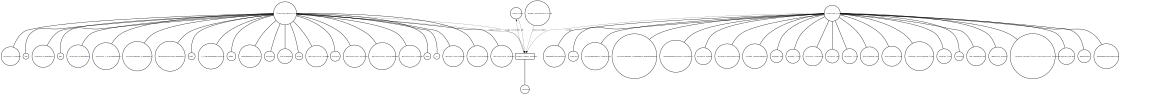

In [9]:
b2.visualize()

In [10]:
pp(b2)

Builder({ 'single_copasi_process': { '_type': 'process',
                             'address': 'local:CopasiProcess',
                             'config': { 'method': 'stochastic',
                                         'model': { 'model_changes': { 'global_parameter_changes': None,
                                                                       'reaction_changes': None,
                                                                       'species_changes': None},
                                                    'model_id': 'BIOMD0000000061',
                                                    'model_language': 'sbml',
                                                    'model_name': 'Unnamed '
                                                                  'Composite '
                                                                  'Process '
                                                                  'Model',
                                               

In [11]:
composite2 = b2.generate()

In [12]:
# TODO: try different solvers for this: certainly stochastic

composite2.run(10)

Error while initializing the simulation: >ERROR 2024-03-04T18:18:15<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
/Users/alex/Desktop/uchc_work/biosimulator-processes/notebooks/../biosimulator_processes/processes/copasi_process.py:253: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

Error while initializing the simulation: >ERROR 2024-03-04T18:18:15<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check t

THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Error while initializing the simulation: >ERROR 2024-03-04T18:18:15<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
Error while initializing the simulation: >ERROR 2024-03-04T18:18:15<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Error while initializing the simulation: >ERROR 2024-03-04T18:18:16<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
Error while initializing the simulation: >ERROR 2024-03-04T18:18:16<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Error while initializing the simulation: >ERROR 2024-03-04T18:18:16<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
Error while initializing the simulation: >ERROR 2024-03-04T18:18:16<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Error while initializing the simulation: >ERROR 2024-03-04T18:18:16<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
Error while initializing the simulation: >ERROR 2024-03-04T18:18:16<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Connect the single process to an emitter instance

In [13]:
from biosimulator_processes.data_model import EmitterConfig, EmittedType


emitter_config = EmitterConfig(
    emit=[
        EmittedType(value_name='floating_species', _type='tree[float]'),
        EmittedType(value_name='time', _type='float')
        
    ],
    name='emitter'
)

In [14]:
b2[emitter_config.name].add_process(
    name='ram-emitter',
    emit={
        'floating_species': 'tree[float]',
        'time': 'float',
    }
)

In [15]:
b2.connect_all()

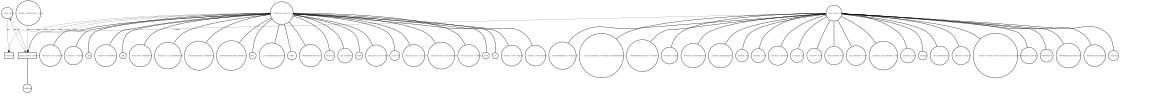

In [17]:
b2.visualize()

In [18]:
b2

Builder({ 'emitter': { '_type': 'step',
               'address': 'local:ram-emitter',
               'config': { 'emit': { 'floating_species': 'tree[float]',
                                     'time': 'float'}},
               'inputs': { 'floating_species': ['floating_species_store'],
                           'time': ['time_store']},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x103a69750>,
               'outputs': {}},
  'floating_species_store': { '1,3-Bisphosphoglycerate': 0.0,
                              'ADP': 0.0,
                              'AMP': 0.0,
                              'ATP': 0.0,
                              'Acetaldehyde': 0.0,
                              'Cytosolic glucose': 0.0,
                              'Dihydroxyacetone phosphate': 0.0,
                              'EtOH': 0.0,
                              'Extracellular acetaldehyde': 0.0,
                              'Extracellular cyanide': 0.0,
          

In [19]:
composite3 = b2.generate()

In [20]:
composite3.run(10)

Error while initializing the simulation: >ERROR 2024-03-04T18:22:03<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
/Users/alex/Desktop/uchc_work/biosimulator-processes/notebooks/../biosimulator_processes/processes/copasi_process.py:253: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

Error while initializing the simulation: >ERROR 2024-03-04T18:22:03<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check t

THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Error while initializing the simulation: >ERROR 2024-03-04T18:22:04<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
Error while initializing the simulation: >ERROR 2024-03-04T18:22:04<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Error while initializing the simulation: >ERROR 2024-03-04T18:22:04<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
Error while initializing the simulation: >ERROR 2024-03-04T18:22:04<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Error while initializing the simulation: >ERROR 2024-03-04T18:22:04<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
Error while initializing the simulation: >ERROR 2024-03-04T18:22:04<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Error while initializing the simulation: >ERROR 2024-03-04T18:22:04<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.
Error while initializing the simulation: >ERROR 2024-03-04T18:22:05<
  At least one reaction is reversible. That means stochastic simulation is not possible. 
  You can use "Tools|Convert to irreversible" which will split the reversible reactions 
   into two irreversible reactions. However you should check the kinetics afterwards.


THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyacetone phosphate': 2.95, 'NAD': 0.65, '1,3-Bisphosphoglycerate': 0.00027, 'NADH': 0.33, 'Phosphoenolpyruvate': 0.04, 'Pyruvate': 8.7, 'Acetaldehyde': 1.48153, 'EtOH': 19.2379, 'Extracellular ethanol': 16.4514, 'Glycerol': 4.196, 'Extracellular glycerol': 1.68478, 'Extracellular acetaldehyde': 1.28836, 'Extracellular cyanide': 5.20358, 'AMP': 0.33, 'P': 0.0, 'Mixed flow cyanide': 5.6, 'Mixed flow glucose': 24.0}}
THE RESULTS AT INTERVAL 1.0:
{'time': 1.0, 'floating_species': {'Extracellular glucose': 6.7, 'Cytosolic glucose': 0.573074, 'ATP': 2.1, 'Glucose-6-Phosphate': 4.2, 'ADP': 1.5, 'Fructose-6-Phosphate': 0.49, 'Fructose 1,6-bisphosphate': 4.64, 'Glyceraldehyde 3-phosphate': 0.115, 'Dihydroxyaceto

Save the composite to a file

In [21]:
b2.write(filename='single_copasi_process_with_emitter')

File 'single_copasi_process_with_emitter' successfully written in 'out' directory.


In [22]:
!ls out

single_copasi_process_with_emitter.json


In [23]:
!cat out/single_copasi_process_with_emitter.json

{
    "single_copasi_process": {
        "_type": "process",
        "address": "local:CopasiProcess",
        "config": {
            "model": {
                "model_id": "BIOMD0000000061",
                "model_source": {
                    "value": "../biosimulator_processes/model_files/BIOMD0000000061_url.xml"
                },
                "model_language": "sbml",
                "model_name": "Unnamed Composite Process Model",
                "model_changes": {
                    "species_changes": null,
                    "global_parameter_changes": null,
                    "reaction_changes": null
                },
                "model_units": null
            },
            "method": "stochastic"
        },
        "inputs": {
            "time": [
                "time_store"
            ],
            "floating_species": [
                "floating_species_store"
            ],
            "model_parameters": [
                "model_parameters_store"
        